In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import choices
import missingno as msno
from sklearn.model_selection import train_test_split
import utils as ut
from tqdm import tqdm

In [20]:
df = pd.read_csv("./data/creditcard.csv")
print(list(df.columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [21]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Проверим на пропуски


<Axes: >

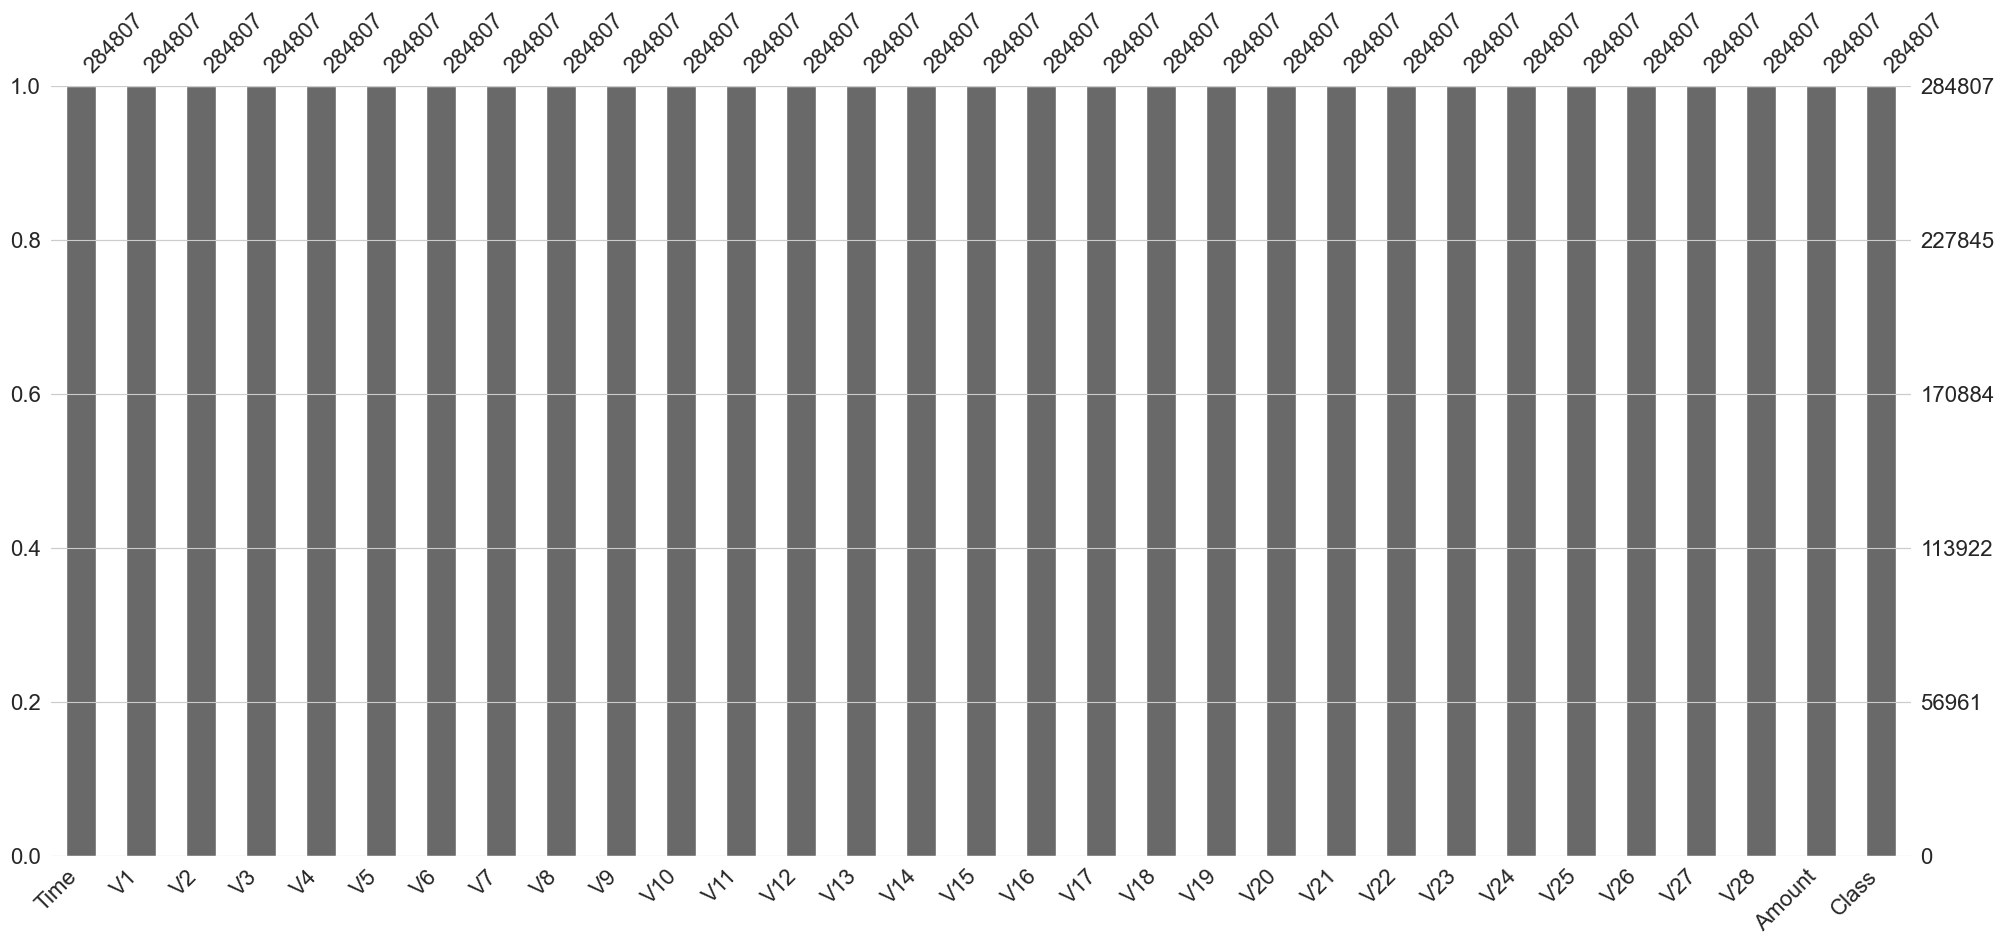

In [22]:
msno.bar(df)

Честные 99.83 % of the dataset
Мошеннические: 0.17 % of the dataset


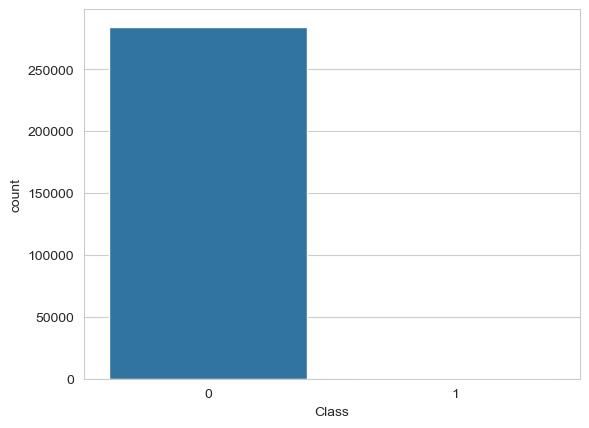

In [23]:
# Посмотрим, какой процент мошенничества в датасете
print('Честные', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Мошеннические:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

sns.countplot(df, x='Class')
plt.show()

In [24]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Коротко о данных:
- Для данных был пременен PCA метод (было сказано на kaggle) -> непонятно что за данные мы вообще имеем.
- К Amount можно применить стандартизацию, чтобы она лежала примерно в тех же значениях, что и остальные данные.

## Балансировка датасета

<Axes: xlabel='Class', ylabel='count'>

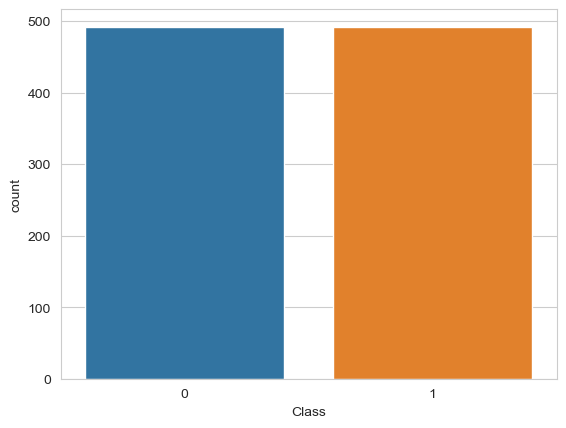

In [25]:
df = ut.balance_the_dataset(df, 'Class')
sns.countplot(df, x='Class' )

## Data processing

In [26]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))
df.drop(columns=["Time"], inplace=True)  # Удалим время, т.к эмпирически было выяснено, что с ним результаты хуже
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,-0.419168,1
1,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,-11.853867,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,-0.421683,1
2,2.084799,-0.903863,-0.618918,-0.237779,-0.856415,-0.277819,-0.805167,-0.070061,0.009440,0.839527,...,-0.642841,-1.363199,0.388504,-0.791320,-0.614041,-0.019803,0.000015,-0.035849,-0.234572,0
3,2.038241,-1.200681,-0.714170,-0.578603,-0.846785,0.309391,-1.094498,0.105588,0.018192,0.959847,...,-0.157011,0.097146,0.037555,-1.008598,-0.274396,0.767814,-0.020950,-0.057676,-0.164980,0
4,2.041544,-0.144772,-2.955160,-0.578916,2.610039,3.142393,-0.417798,0.784572,0.359984,-0.350754,...,-0.352752,-0.996573,0.364093,0.604791,-0.264306,0.219744,-0.039079,-0.042907,-0.420447,0


## Разделим датасет на тренировочную и тестовую выборки

In [27]:
y = df['Class']
X = df.drop(columns='Class')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Попробуем несколько разных классификаторов

In [28]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from hyperopt.pyll import scope as ho_scope
from hyperopt import Trials, hp

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [49]:
def fit_predict(model, eval_data):
    try:
        model = model(n_jobs=-1)
    except TypeError:
        model = model(random_state=42)
    finally:
        X_train = eval_data['X_train'] if type(eval_data['X_train']) == np.ndarray else eval_data['X_train'].values
        y_train = eval_data['y_train'] if type(eval_data['y_train']) == np.ndarray else eval_data['y_train'].values
        X_test = eval_data['X_test'] if type(eval_data['X_test']) == np.ndarray else eval_data['X_test'].values

        model.fit(X_train, y_train.ravel())
        pred = model.predict(X_test)
        return model, pred




In [50]:
eval_data = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
models = [LogisticRegression, KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, xgb.XGBClassifier]
max_evals = len(models)
metric = roc_auc_score  # f1_score, roc_auc_score, accuracy_score
metrics = []
for model in models:
    _, pred = fit_predict(model, eval_data)

    metrics.append(metric(eval_data['y_test'].values.ravel(), pred))


In [51]:
def hist_plot(models_names, metrics):
    fig, ax = plt.subplots(figsize=(5, 5), nrows=1, ncols=1)
    ax.bar(models_names, metrics)
    ax.set_title("Распределение ROC_AUC_SCORE по моделям")
    ax.set_xlabel("Модель")
    ax.set_ylabel("ROC_AUC_SCORE")
    fig.set_figwidth(10)  # ширина Figure
    plt.ylim(0.90, 0.95)


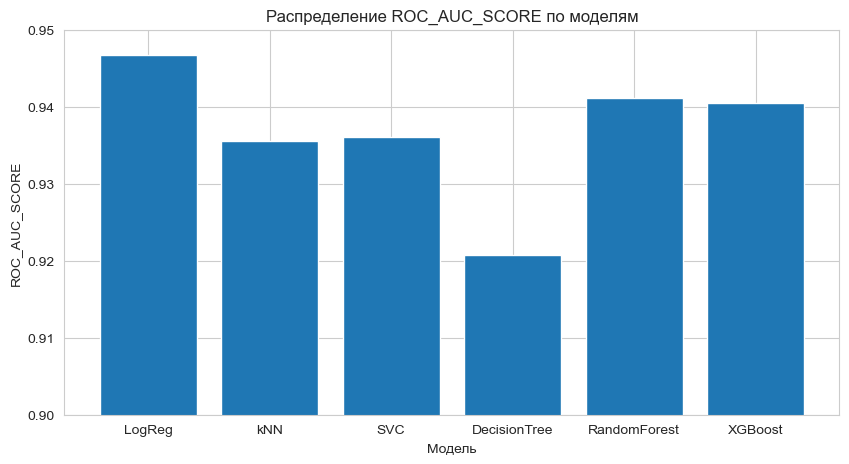

In [52]:
models_names = ['LogReg', 'kNN', 'SVC', 'DecisionTree', 'RandomForest', 'XGBoost']
hist_plot(models_names, metrics)

In [33]:
best_metric = max(metrics)
best_model = models_names[metrics.index(best_metric)]

print('Best Model:', best_model)
print('Best Metric, ROC_AUC_SCORE:', best_metric)

Best Model: LogReg
Best Metric, ROC_AUC_SCORE: 0.9467218771566599


## SVM hyperparameters tuning

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ('linear', 'poly', 'rbf'),
    'C': (0.001, 0.01, 0.1, 1, 10),
    'gamma': (0.01, 0.1, 0.5, 1)
}

SVM = SVC(random_state=42)
clf=GridSearchCV(SVM, param_grid=parameters, cv=3)
clf.fit(X_train,y_train)

SVM = SVC(random_state=42, **clf.best_params_)
_, pred = fit_predict(SVM, eval_data)
ut.print_classif_report('SVM', pred, y_test)


SVM: 
- roc_auc_score: 0.9362
- accuracy_score: 0.9358
- f1_score: 0.9404



## Logistic Regression hyperparameters tuning


In [35]:
# импорт нужного модуля для поиска параметров
from sklearn.model_selection import GridSearchCV

# создадим словарь для перебора параметров
parameters = {
    'C': (0.001, 0.01, 0.1, 1, 10),
    'penalty': ('l1','l2')
}

# создадим объект модели
lr = LogisticRegression(random_state=42, solver='saga', max_iter=10000)

# создадим объект GridSearchCV
clf=GridSearchCV(lr, param_grid=parameters, cv=3)

# обучение модели по сетке гиперпараметров
clf.fit(X_train,y_train)

lr = LogisticRegression(
    random_state=42,
    solver='saga',
    max_iter=10000,
    **clf.best_params_)
_, pred = fit_predict(lr, eval_data)
ut.print_classif_report('Logistic Regression', pred, y_test)

Logistic Regression: 
- roc_auc_score: 0.9467
- accuracy_score: 0.9459
- f1_score: 0.9497



## RandomForest and XGBoost hyperparameters tuning

In [36]:
eval_data = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
max_evals = 20
metric = roc_auc_score  # f1_score, roc_auc_score, accuracy_score

params_xgb = {
    'max_depth': ho_scope.int(hp.quniform("max_depth", 1, 20, 1)),
    # 'learning_rate': hp.uniform("learning_rate", 0.0005, 0.3),
    'min_child_weight' : ho_scope.int(hp.quniform('min_child_weight', 1, 6, 1)),
    'n_estimators':ho_scope.int(hp.quniform('n_estimators', 100, 1000, 1)),
    'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
}
params_rf = {
    'n_estimators':ho_scope.int(hp.quniform('n_estimators', 100, 1000, 1)),
    'max_depth':ho_scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'min_samples_leaf':ho_scope.int(hp.quniform('min_samples_leaf', 2, 10, 1)),
    'min_samples_split':ho_scope.int(hp.quniform('min_samples_split', 2 ,10 ,1))
}

space_xgb = {
    'params': params_xgb,
    'eval_data': eval_data,
    'metric': metric,
    'model': xgb.XGBClassifier
}

space_rf = {
    'params': params_rf,
    'eval_data': eval_data,
    'metric': metric,
    'model': RandomForestClassifier
}

In [37]:
from joblib import Parallel, delayed

params_for_hp_tuning = ((Trials(), space_xgb, max_evals), (Trials(), space_rf, max_evals))

result = Parallel(n_jobs=2)(delayed(ut.hp_optimize)(x, y, z) for x, y, z in tqdm(params_for_hp_tuning))
best_hyperparams_rf = ut.best_hyperparams_transform(result[1])
best_hyperparams_xgb = ut.best_hyperparams_transform(result[0])

print(result)

100%|██████████| 2/2 [00:00<00:00,  5.90it/s]


[{'colsample_bytree': 0.55, 'eta': 0.4, 'max_depth': 13, 'min_child_weight': 5, 'n_estimators': 658, 'subsample': 0.9}, {'max_depth': 19, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 131}]


In [38]:
space = {
    'params':best_hyperparams_rf,
    'eval_data': eval_data,
    'model': RandomForestClassifier
}

rf_model, rf_pred = ut.model_fit_predict(space)

In [39]:
space = {
    'params':best_hyperparams_xgb,
    'eval_data': eval_data,
    'model': xgb.XGBClassifier
}

xgb_model, xgb_pred = ut.model_fit_predict(space)

In [40]:
ut.print_classif_report('RandomForestClassifier', rf_pred, y_test)
ut.print_classif_report('XGBoostClassifier', xgb_pred, y_test)

RandomForestClassifier: 
- roc_auc_score: 0.9417
- accuracy_score: 0.9392
- f1_score: 0.9423

XGBoostClassifier: 
- roc_auc_score: 0.9442
- accuracy_score: 0.9426
- f1_score: 0.946

